In [1]:
include("Automata.jl")

using PyPlot
using AD

    ^(AD.Taylor, Number) at /home/ignacio/Documents/Physics/2016-2/ChaosCrypto/wip/Automata.jl:152
is ambiguous with: 
    ^(Any, Integer) at intfuncs.jl:108.
To fix, define 
    ^(AD.Taylor, Integer)
before the new definition.


In [2]:
#Funciones Runge Kutta
function runge2(f,x,t,dt)
    k1 = f(x,t)
    k2 = f(x+2dt*k1/3, t+2*dt/3)
    (k1/4+3k2/4)
end

function runge4(f,x,t,dt)
    k1 = f(x,t)
    k2 = f(x+dt*k1/2, t+dt/2)
    k3 = f(x+dt*k2/2,t+dt/2)
    k4 = f(x+dt*k3,t + dt)
    (k1+2k2+2k3+k4)/6
end

function superrunge(f,x,t,dt)
    x1x,u1x,x1y,u1y,x2x,u2x,x2y,u2y = x
    normi = ((x1x-x2x)^2+(x1y-x2y)^2)^(-3/2)
    if normi < 1e-3
        return "fin"
    else
        k1 = f(x,t)
        k2 = f(x+dt*k1/2, t+dt/2)
        k3 = f(x+dt*k2/2,t+dt/2)
        k4 = f(x+dt*k3,t + dt)
        (k1+2k2+2k3+k4)/6
    end
end

superrunge (generic function with 1 method)

In [3]:
#Integracion
function integrar(f, x0, t0, t_final, dt, metodo = 4)
    # necesito una function f(x,t)
    # que come un vector x, el tiempo t
    # y regresa un vector (el campo vectorial evaluado en x,t)
    
    tiempos = [t0]
    xs = typeof(x0)[x0]

    #x = copy(x0)  # ver pythontutor.com
    
    x = x0
    
    for t in t0:dt:t_final
        if metodo == 1
            k = f(x,t)
        elseif metodo == 2
            k = runge2(f,x,t,dt)
        elseif metodo == 4
            k = runge4(f,x,t,dt)
        elseif metodo == 20
            k = superrunge(f,x,t,dt)
            if k == "fin"
                return xs, tiempos
            end
        else
            error("Los únicos métodos son 1 2 ó 4")
        end
        x_nueva = x + dt*k
        
        push!(xs, x)
        push!(tiempos, t)
        
        x = x_nueva
        
    end
    
    xs, tiempos
end

integrar (generic function with 2 methods)

In [4]:
#Funcion para generar Taylor
function generarTaylor(condIni, funcion)
    funcion(condIni)
end

#Funcion para generar serie
function generarSerie(polTalor)
    x = Float64[]
    push!(x, polTalor.ini)
    valores = copy(polTalor.coef)
    for i in 1:length(valores)
        push!(x, valores[i]/i)
    end
    x
end

#Funcion para generar intervalos
function generaIntervalo(lista)
    p = length(lista)
    h = lista[end]
    while (lista[p] == 0)
        p -= 1
        h = lista[p]
    end
    ϵ = 1e-3
    (ϵ/h)^(1/p)
end

#Funcion horner
function horner(x,h = 1e-3)
    p = length(x)
    xt = zeros(x)
    xt[p-1] = x[p-1] + h*x[p]
    for i in 3:p
        xt[p-i+1] = x[p-i+1] + h*xt[p-i+1+1]
    end
    xt[1]
end

#Funcion Lorenz
function lorenz(xx, t)
    x, y, z, xr, yr, zr= xx
    AD.Taylor(x, [σ])*(AD.Taylor(x,[y])-AD.Taylor(x,[x])),
    AD.Taylor(y,[x])*(AD.Taylor(y,[ρ])-AD.Taylor(y,[z]))-AD.Taylor(y,[y]),
    AD.Taylor(z,[x])*AD.Taylor(z,[y])-AD.Taylor(z,[β])*AD.Taylor(z,[z]),
    AD.Taylor(xr,[σ])*(AD.Taylor(xr,[y])-AD.Taylor(xr,[xr])),
    AD.Taylor(yr,[ρ])*AD.Taylor(yr,[xr])-AD.Taylor(yr,[yr])-AD.Taylor(yr,[xr])*AD.Taylor(yr,[zr]),
    AD.Taylor(zr,[xr])*AD.Taylor(zr,[yr])-AD.Taylor(zr,[β])*AD.Taylor(zr,[zr])
end

lorenz (generic function with 1 method)

In [5]:
#Funcion integradora 
function integrador(x0, f, tf)
    a = generarTaylor(x0,f)
    b = map(generarSerie,a)
    suma = map(horner,b)
    sol = Array{Float64,1}[x0, [suma...]]
    t = [0.,1e-3]
    while t[end] < tf
        a = generarTaylor(sol[end],f)
        b = map(generarSerie,a)
        suma = map(horner,b)
        push!(sol,[suma...])
        push!(t,t[end]+1e-3)
    end
    sol,t
end

integrador (generic function with 1 method)

In [9]:
σ = 10
ρ = 60
β = 8/3

2.6666666666666665

In [10]:
function lorenzSin(xx,t)
    x, y, z, xr, yr, zr = xx
    
    m = sin(t)
    s = x + m
    
    [σ*(y-x), (ρ*x - y - x*z), x*y-β*z,
     σ*(yr-xr), (ρ*s - yr - s*zr) , (s*yr - β*zr)]
end

lorenzSin (generic function with 1 method)

In [11]:
xsSin, tsSin = integrar(lorenzSin,[1., 1., 1., 1., 1., 1.],0. ,30. ,1e-3,4)

([[1.0,1.0,1.0,1.0,1.0,1.0],[1.0,1.0,1.0,1.0,1.0,1.0],[1.000288956351818,1.0579775186819051,0.9983646203871539,1.0002890544156735,1.0580070092221987,0.9983651490917144],[1.0011517840606747,1.1159326863958128,0.9967921164530711,1.0011525664313716,1.1160506105954693,0.9967943459835544],[1.0025827185285459,1.1738991359527675,0.9952830348064678,1.0025853518248427,1.174164379709357,0.9952883092770297],[1.0045763853539194,1.231910139929975,0.9938380465645921,1.0045826102242699,1.2323815315410263,0.9938478822439836],[1.0071277929787703,1.2899986334474847,0.9924579461536236,1.0071399178145775,1.2907349432225397,0.992474031953802],[1.010232325633097,1.3481972364992933,0.9911436504182564,1.010253220340607,1.3492571763607257,0.9911678487042633],[1.0138857365697038,1.4065382758549727,0.9898961980316839,1.0139188263998355,1.4079804989257423,0.9899305457477223],[1.0180841415821507,1.4650538065475114,0.988716749198085,1.0181334010175442,1.4669369067240299,0.9887634593051859]  …  [8.178158584660933,16

In [12]:
m = sin(tsSin)
s = [x[1] for x in xsSin] + m
m_hat = s - [x[4] for x in xsSin]

30002-element Array{Any,1}:
  0.0        
  0.0        
  0.000999902
  0.00199922 
  0.00299736 
  0.00399376 
  0.00498785 
  0.00597907 
  0.00696685 
  0.00795066 
  0.00892993 
  0.00990414 
  0.0108728  
  ⋮          
 -0.174206   
 -0.170534   
 -0.167068   
 -0.163813   
 -0.160769   
 -0.157943   
 -0.155335   
 -0.15295    
 -0.150792   
 -0.148863   
 -0.147167   
 -0.145708   

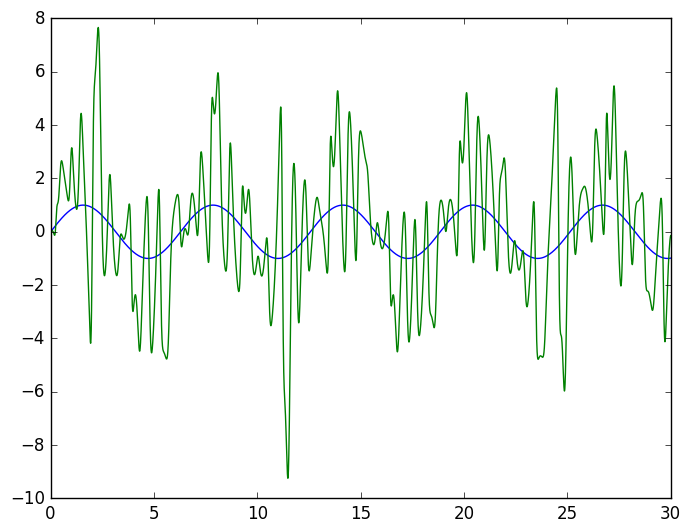

In [13]:
plot(tsSin, m)
plot(tsSin, m_hat)
legend()

In [34]:
function paso(x)
    if x > 2 && x < 3
        return 1.
    end 
    0.
end

paso (generic function with 1 method)

In [35]:
function lorenzpaso(xx,t)
    x, y, z, xr, yr, zr = xx
    
    m = paso(t)
    s = x + m
    
    [σ*(y-x), (ρ*x - y - x*z), x*y-β*z,
     σ*(yr-xr), (ρ*s - yr - s*zr) , (s*yr - β*zr)]
end

lorenzpaso (generic function with 1 method)

In [36]:
xsPaso, tsPaso = integrar(lorenzpaso,[1., 1., 1., 1., 10, 10],0. ,30. ,1e-3,4)

([[1.0,1.0,1.0,1.0,10.0,10.0],[1.0,1.0,1.0,1.0,10.0,10.0],[1.000288956351818,1.0579775186819051,0.9983646203871539,1.0897508045182125,10.039993142987552,9.983376481627849],[1.0011517840606747,1.1159326863958128,0.9967921164530711,1.1790065153117362,10.07999170767026,9.966842971569879],[1.0025827185285459,1.1738991359527675,0.9952830348064678,1.2677722547525603,10.120024171982708,9.950405054820807],[1.0045763853539194,1.231910139929975,0.9938380465645921,1.3560533761693427,10.160118729061821,9.934068342024231],[1.0071277929787703,1.2899986334474847,0.9924579461536236,1.4438554588099222,10.200303306116366,9.91783847249057],[1.010232325633097,1.3481972364992933,0.9911436504182564,1.531184303039814,10.240605582918809,9.9017211173818],[1.0138857365697038,1.4065382758549727,0.9898961980316839,1.618045925770656,10.281053009933466,9.88572198305912],[1.0180841415821507,1.4650538065475114,0.988716749198085,1.704446556112763,10.321672826094396,9.869846814590405]  …  [8.178158584660933,16.35844226

In [37]:
mpaso = [paso(p) for p in tsPaso]

30002-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮  
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [38]:
s = [x[1] for x in xsPaso] + m
m_hat_paso = s - [x[4] for x in xsPaso]

30002-element Array{Any,1}:
  0.0      
  0.0      
 -0.0884618
 -0.175855 
 -0.26219  
 -0.347477 
 -0.431728 
 -0.514952 
 -0.59716  
 -0.678362 
 -0.758569 
 -0.837789 
 -0.916032 
  ⋮        
 -0.989669 
 -0.989525 
 -0.98938  
 -0.989234 
 -0.989087 
 -0.988939 
 -0.988791 
 -0.988641 
 -0.98849  
 -0.988338 
 -0.988185 
 -0.988032 

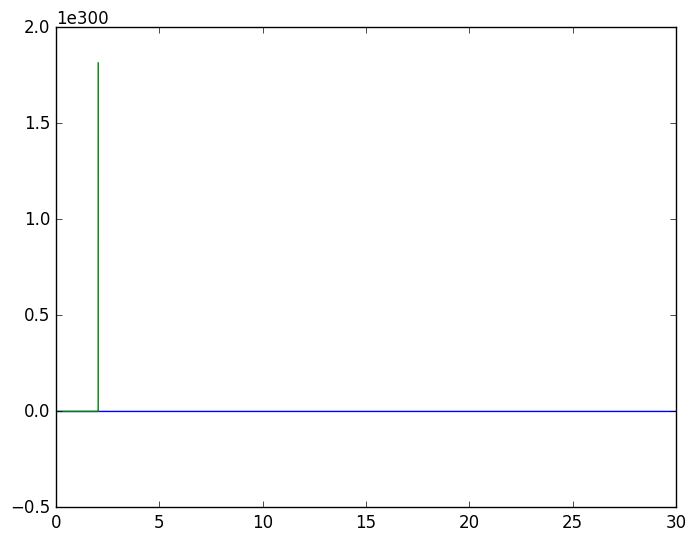

In [33]:
plot(tsPaso, mpaso)
plot(tsPaso, m_hat_paso)
legend(

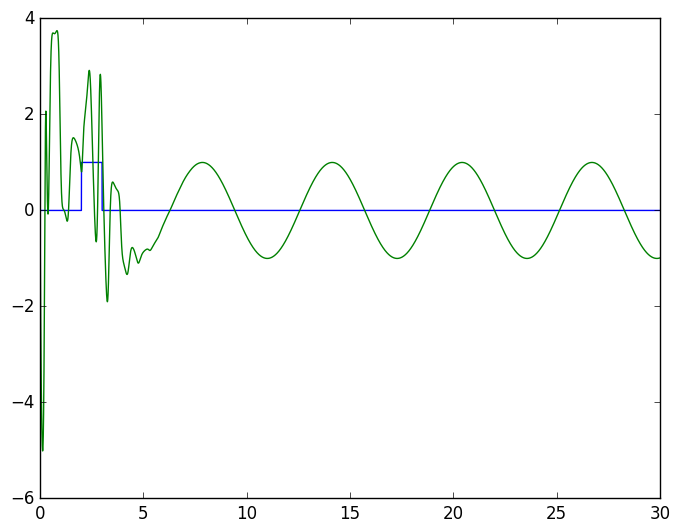

In [39]:
plot(tsPaso, mpaso)
plot(tsPaso, m_hat_paso)
legend()